In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Importing the dataset
titanic_data = pd.read_csv('titanic.csv') 

In [3]:
# Checking for Null Values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Data Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

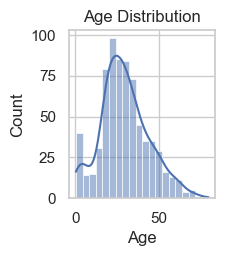

In [5]:
# Histogram of Age
plt.subplot(2, 3, 1)
sns.histplot(data=titanic_data, x='Age', kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Survival Count')

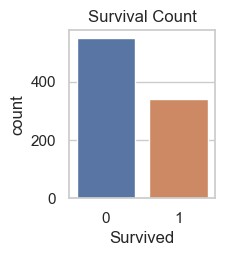

In [6]:
# Countplot of Survived
plt.subplot(2, 3, 2)
sns.countplot(data=titanic_data, x='Survived')
plt.title('Survival Count')

Text(0.5, 1.0, 'Fare Distribution')

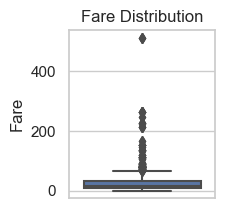

In [7]:
# Boxplot of Fare
plt.subplot(2, 3, 3)
sns.boxplot(data=titanic_data, y='Fare')
plt.title('Fare Distribution')

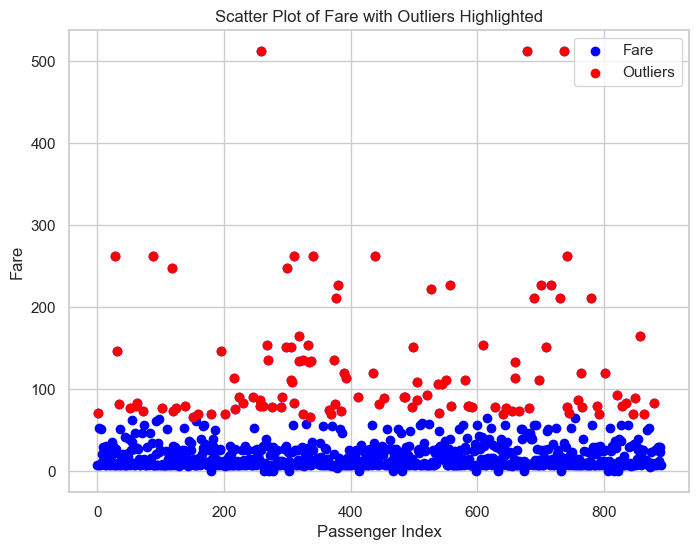

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detect and extract outliers using IQR method
Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = titanic_data[(titanic_data['Fare'] < lower_bound) | (titanic_data['Fare'] > upper_bound)]

# Create a scatter plot of 'Fare' with outliers in red
plt.figure(figsize=(8, 6))
plt.scatter(titanic_data.index, titanic_data['Fare'], c='blue', label='Fare')
plt.scatter(outliers.index, outliers['Fare'], c='red', label='Outliers')
plt.title('Scatter Plot of Fare with Outliers Highlighted')
plt.xlabel('Passenger Index')
plt.ylabel('Fare')
plt.legend()
plt.show()


In [11]:
# Splitting Dependent and Independent Variables
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [12]:
# Perform Encoding (e.g., Label Encoding for Sex column)
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])

In [13]:
# Feature Scaling (e.g., Standardization)
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

In [14]:
# Splitting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)